In [47]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2 as cv
import time as t
import imutils 
import math

In [53]:
mpl.rc('axes', titlesize=14)  
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Routine to fix the image
def fix_image(image):  
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)

def distance(pt1, pt2):
    (x1, y1), (x2, y2) = pt1, pt2
    dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    return dist, x1, y1, x2, y2

def fuse_contours(image, contours):
    best_contours_points = []
    
    mask = np.zeros_like(image, dtype=np.uint8)
    
    # Loop through the contours and find the best ones to fill
    for cnts in contours:
        if cv.arcLength(cnts, False) > 1000:
            for p in cnts:
                best_contours_points.append(p)
                print(p)
            cv.drawContours(mask, [cnts], -1, (255, 255, 255), -1)
    plt.imshow(mask, cmap='gray')
    plt.show()
    plt.axis('off')
    return best_contours_points

def avarage_points(thresh: int, coordinates):
    # coordinates.reverse()
    avaregae_coord = []
    
    for i in range(len(coordinates) - 1):
        n, x_sum, y_sum = 0, 0, 0
        dist, x1, y1, x2, y2 = distance(coordinates[i], coordinates[i + 1])
        if dist < thresh: # If distance is lower, then calculate the average
            x_sum += x1
            y_sum += y1
            n += 1
        else:
            avaregae_coord.append(tuple(x_sum // n, y_sum // n))
            n, x_sum, y_sum = 0, 0, 0
        

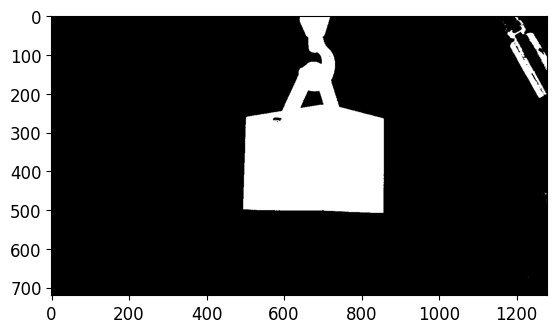

In [33]:
image = cv.imread("1.jpg")

# COnvert to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

thresh = cv.threshold(gray, 140, 255, cv.THRESH_BINARY_INV)[1]


plt.imshow(fix_image(thresh))


# Contour Approximation

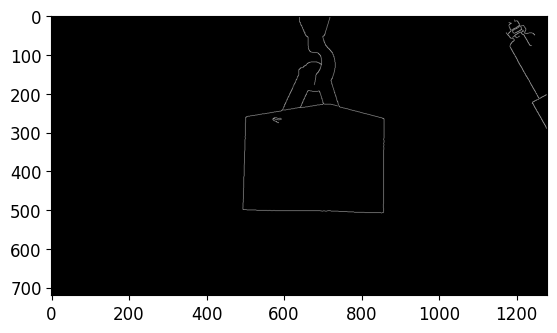

ValueError: not enough values to unpack (expected 2, got 1)

In [56]:
# Read image
image = cv.imread("1.jpg")

# COnvert to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# smooth the image
gray = cv.GaussianBlur(gray, (5, 1), 0)
# bi = cv.bilateralFilter(gray, 5, 75, 75)
# smooth = cv.GaussianBlur(gray, (5, 7), 0)

canny = cv.Canny(gray, 100, 300)
plt.imshow(fix_image(canny))
plt.show()

contours_raw, hierarky = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = [cnt for cnt in contours_raw if cv.arcLength(cnt, False) > 1000]

avarage_p1 = avarage_points(30, contours[0])

print(avarage_p1)


for i in range(len(contours)):
    output = image.copy()
    hull = cv.convexHull(contours[i], returnPoints=True)
    print(hull)
    cv.drawContours(output, hull, -1 , (0, 255, 0), 6)
    plt.imshow(fix_image(output))
    plt.show()

for cnt in contours:
    print("Area: ", cv.contourArea(cnt))
    print("Perimeter: ", cv.arcLength(cnt, False))
    print("Number of points: ", len(cnt))
    print("Bounding Rect: ", cv.boundingRect(cnt))
    print("Bounding Box: ", cv.minAreaRect(cnt))
    approx = cv.approxPolyDP(cnt, 0.01 * cv.arcLength(cnt, True), True)

    # cv.circle(image, c, 5, (255, 0, 0), -1)

    output = image.copy()
    for points in approx:
        cv.circle(output, tuple(points[0]), 5, (255, 0, 0), -1)
    plt.imshow(fix_image(output))
    plt.show()
    
    
print("Fuse contours")
best = fuse_contours(image, contours, hierarky)

print(best)
    
# cv.drawContours(image, [best], -1 , (0, 255, 0), 2)
plt.imshow(fix_image(output))
plt.show()